In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collecting

In [2]:
train = pd.read_csv('kc_house_data.csv')
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Data Preprocessing

In [4]:
#fix date format
train['date'] = train['date'].str.replace('T000000', '', regex=False)
train['date'] = pd.to_datetime(train['date']).dt.date
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
train['renovated'] = (train['yr_renovated'] != 0).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [6]:
int_columns = ['bathrooms', 'bedrooms', 'floors', 'grade', 'condition', 'yr_built', 
               'sqft_basement', 'sqft_above', 'sqft_living15', 'sqft_lot15', 
               'waterfront', 'view', 'renovated']

for col in int_columns:
    if col in train.columns:
        train[col] = train[col].round().astype(int)

In [7]:
train.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-06-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.058715,2079.899736,1.510697e+04,1.534956,0.007542,0.234303,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.042289
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.755524,918.440897,4.142051e+04,0.554742,0.086517,0.766318,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.201253
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,2.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,2.000000,0.000000,0.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000


In [8]:
#check for any missing value
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [9]:
df = train

In [10]:
#split numeric and categorical feature

numeric_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object']).columns

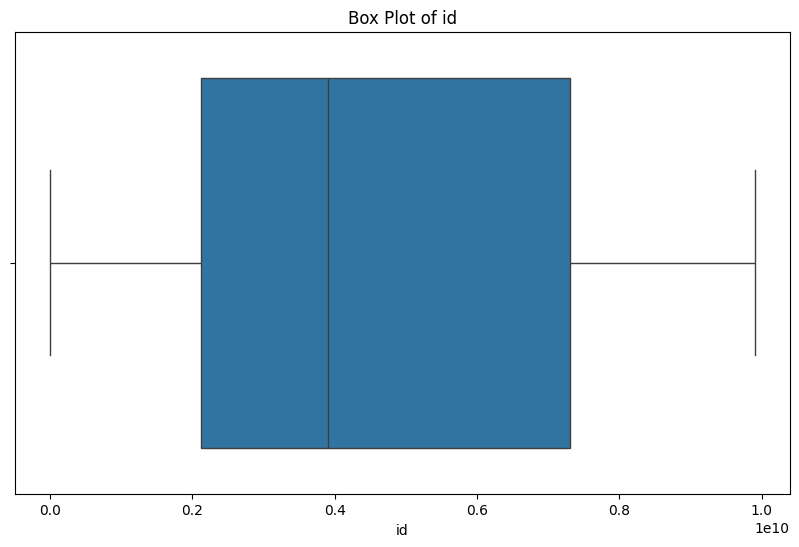

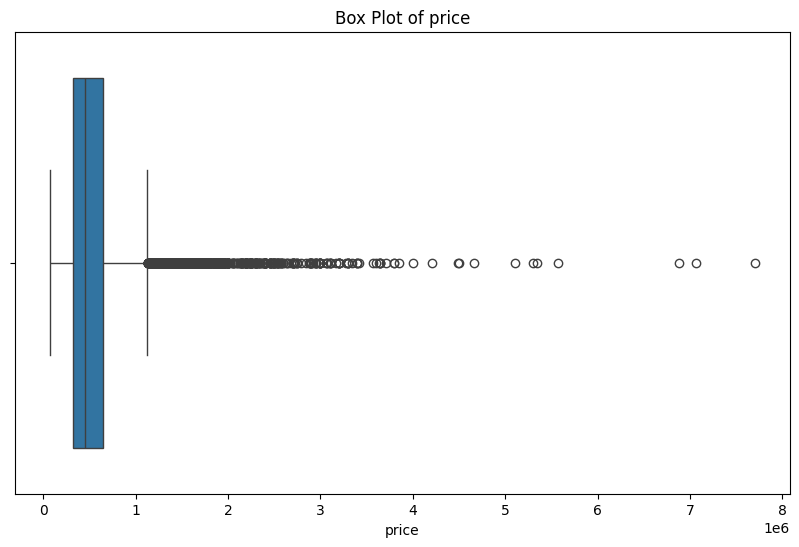

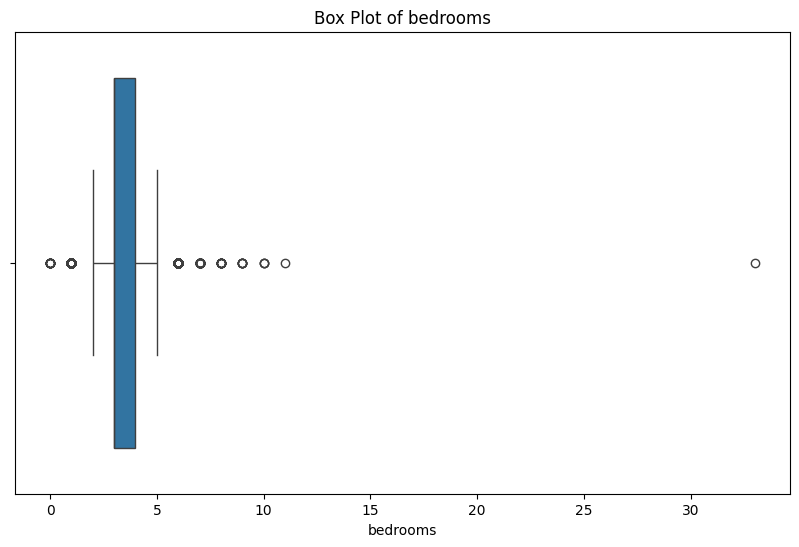

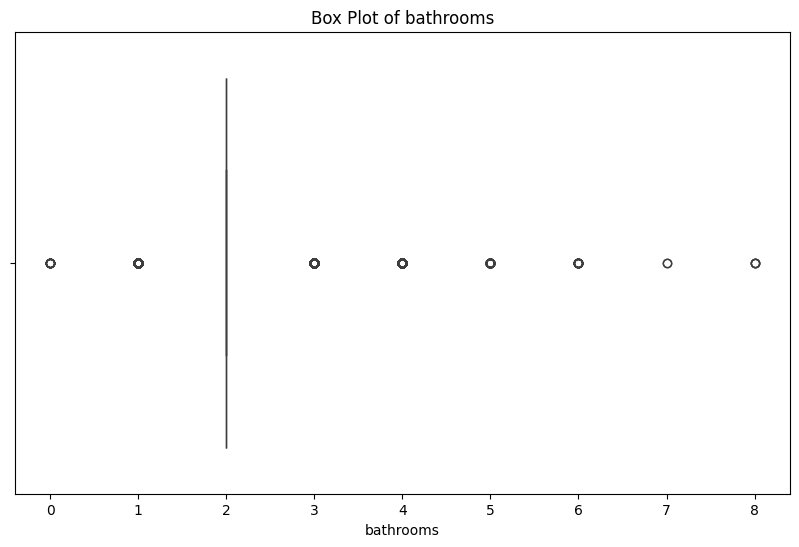

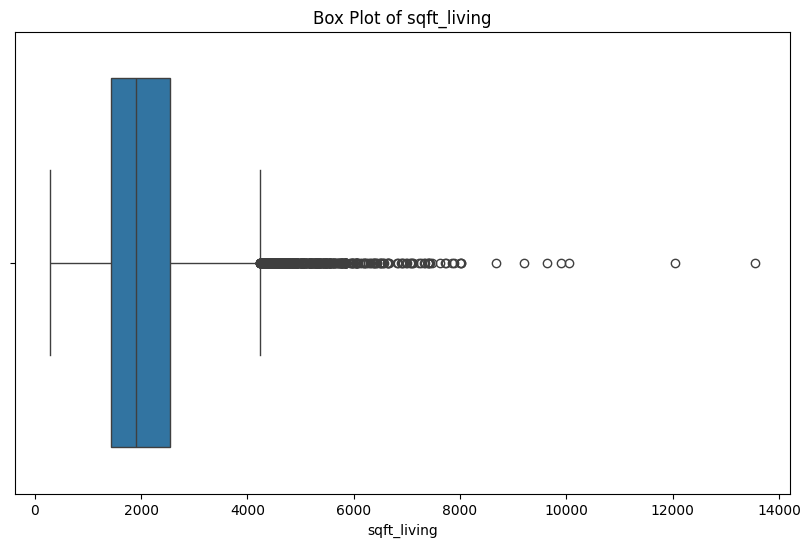

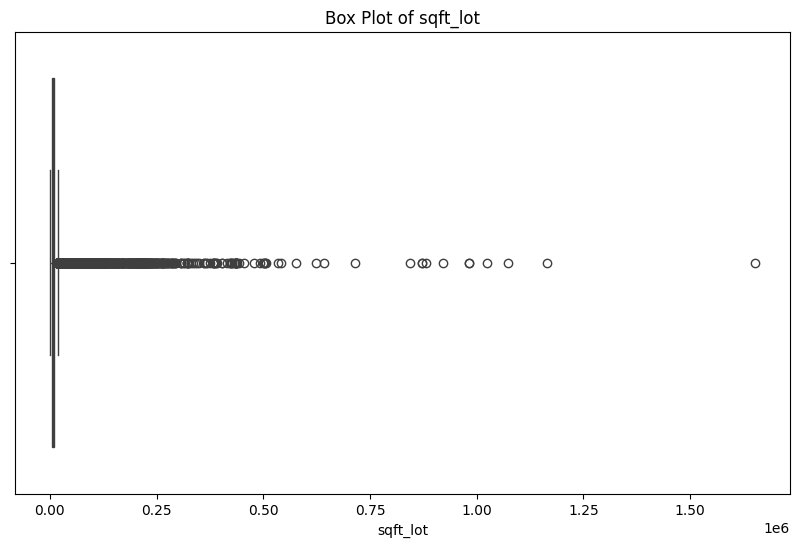

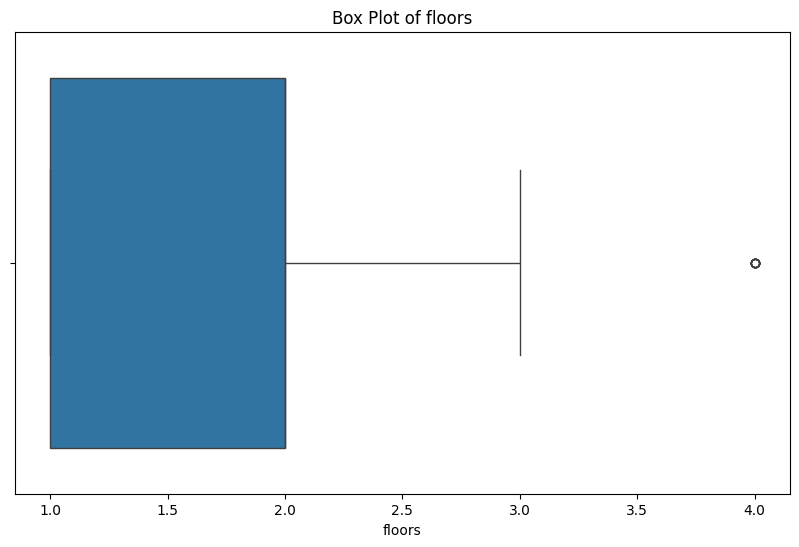

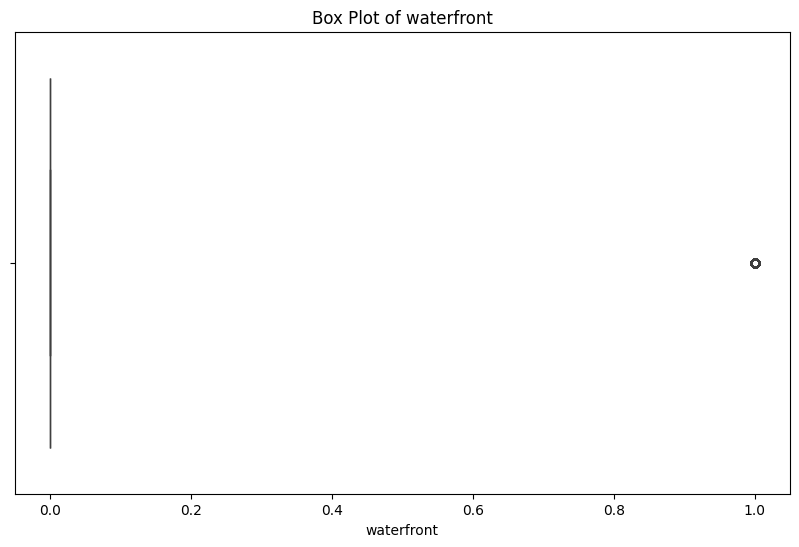

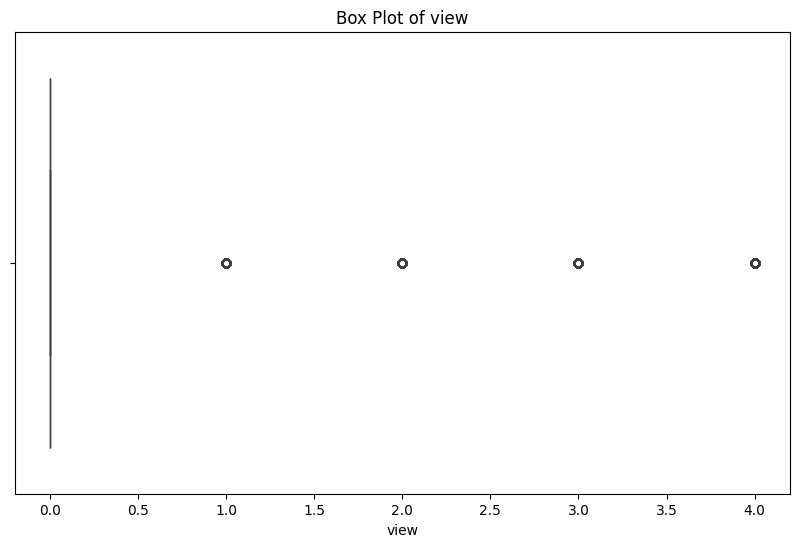

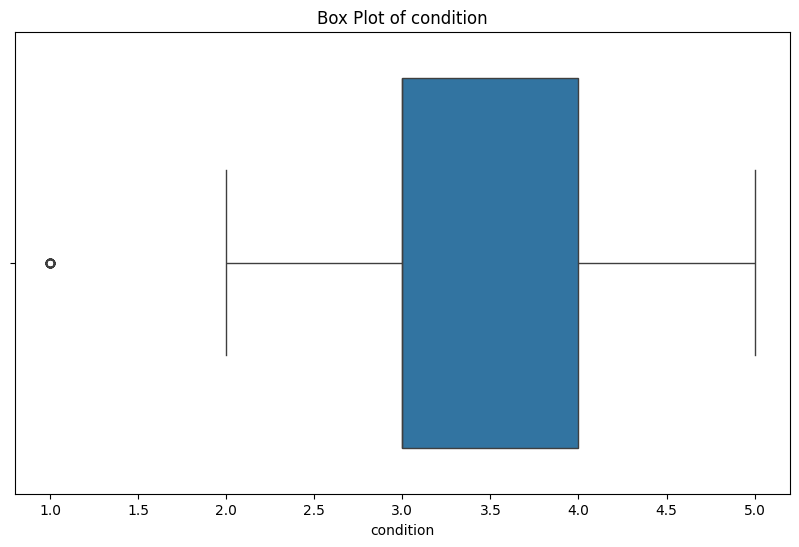

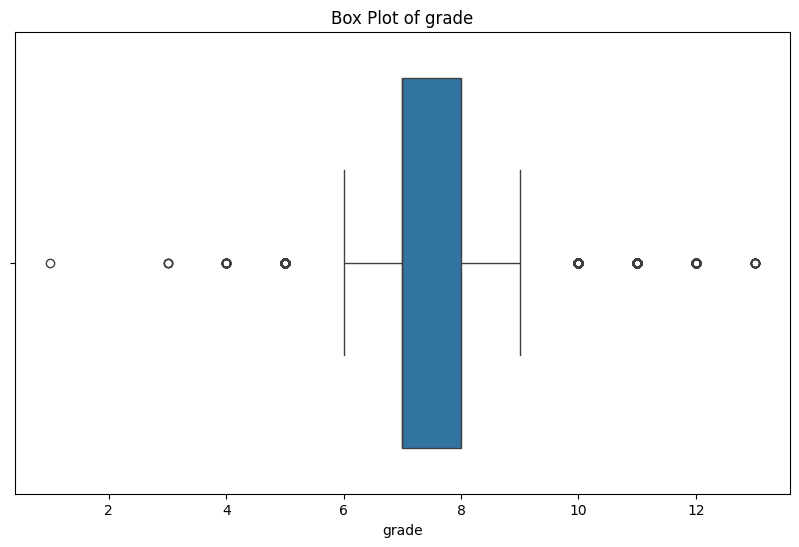

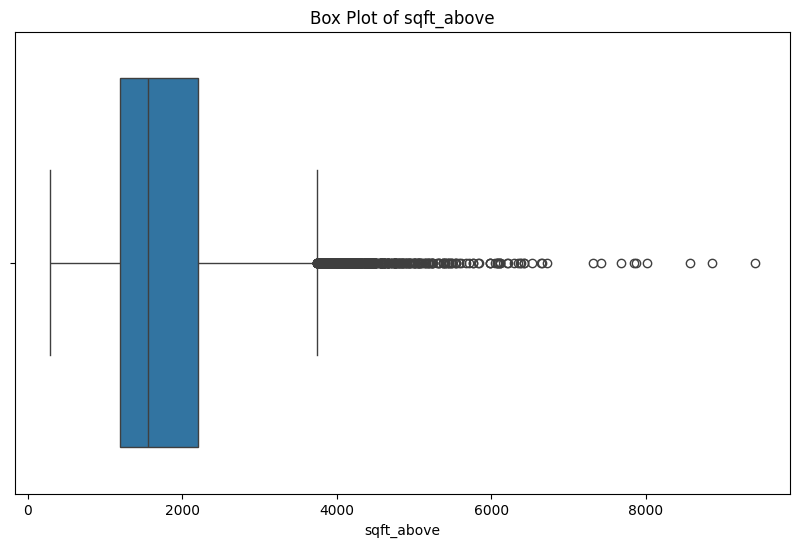

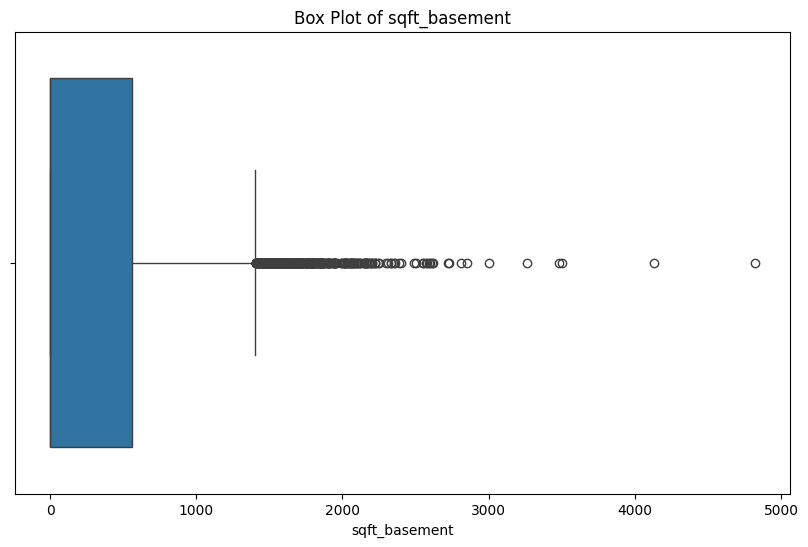

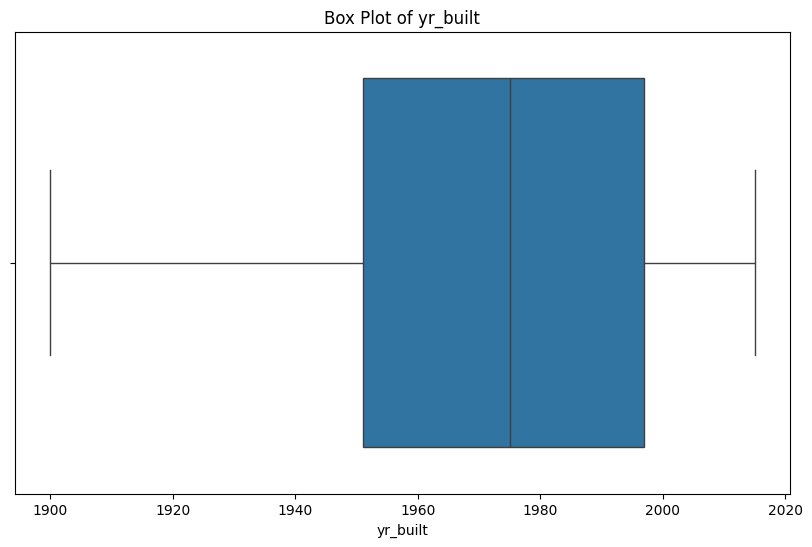

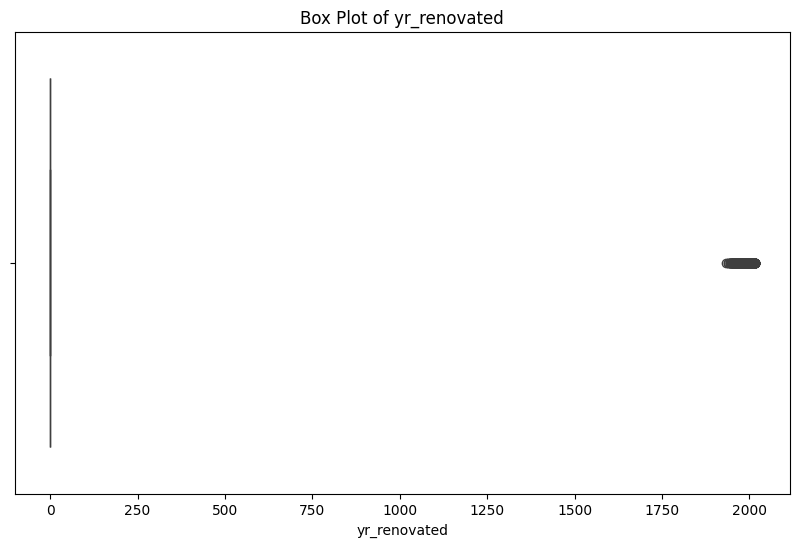

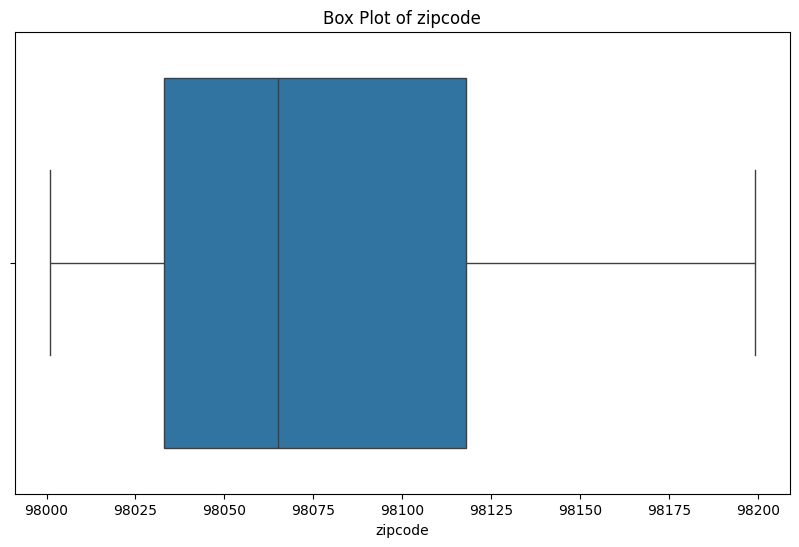

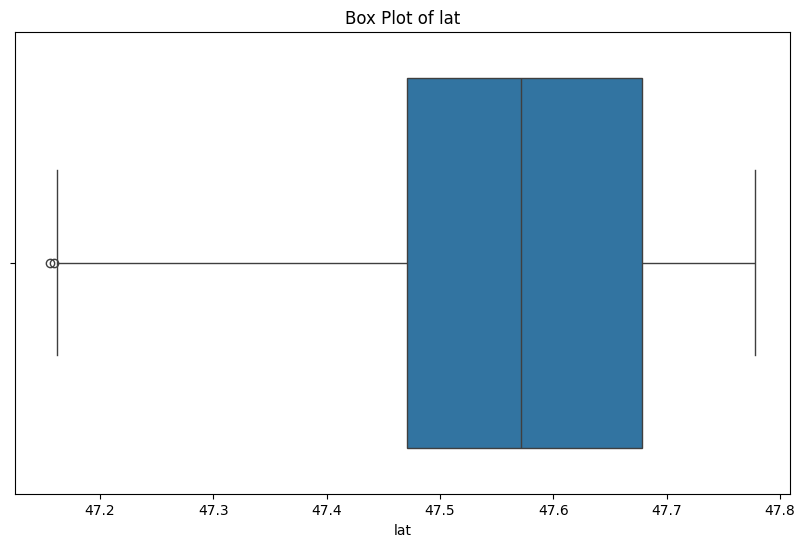

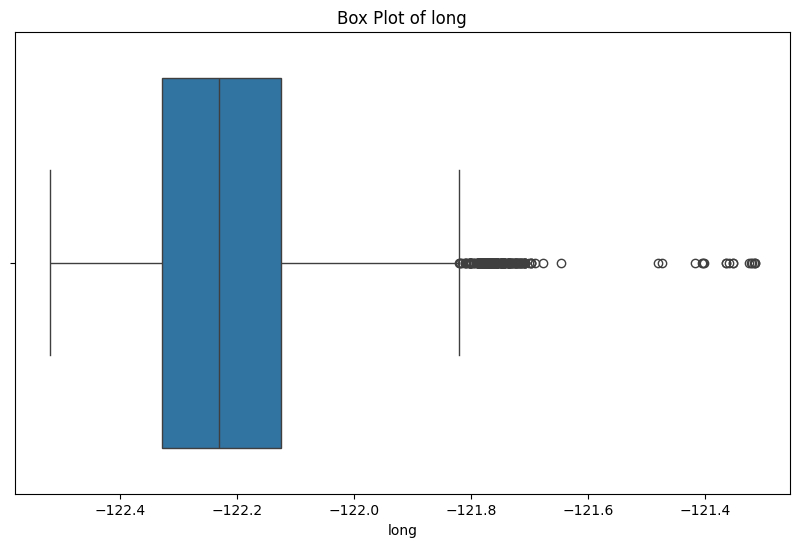

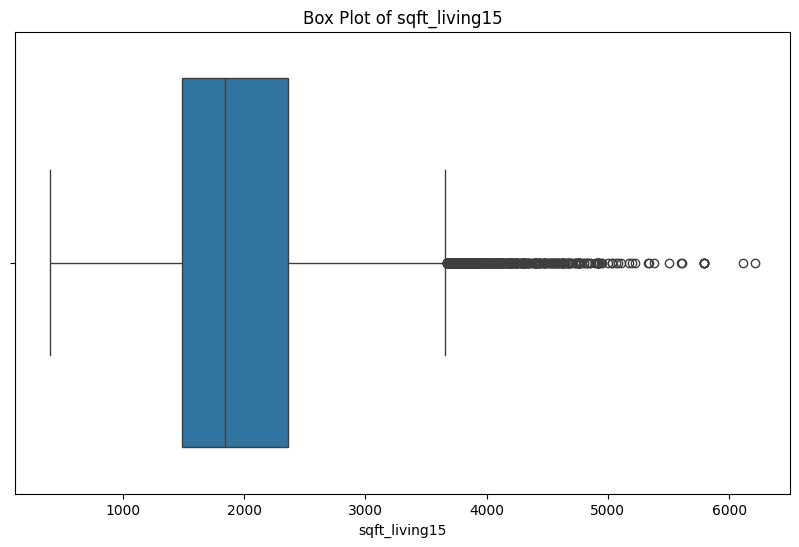

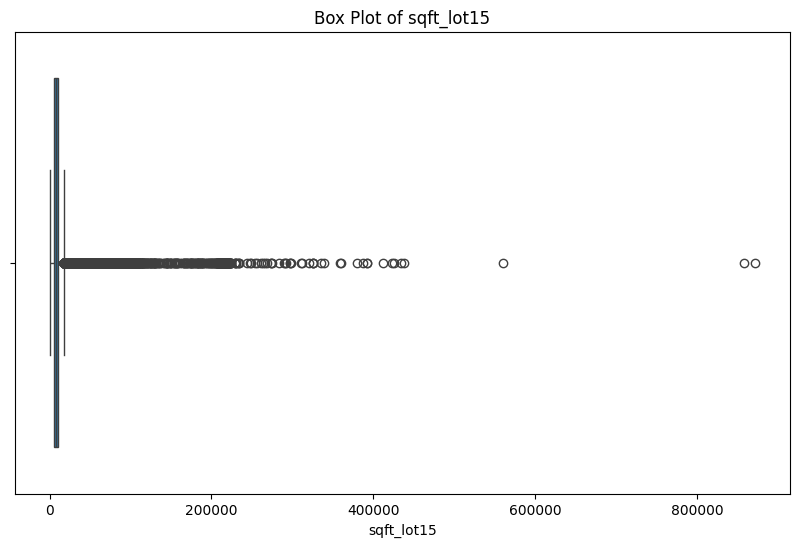

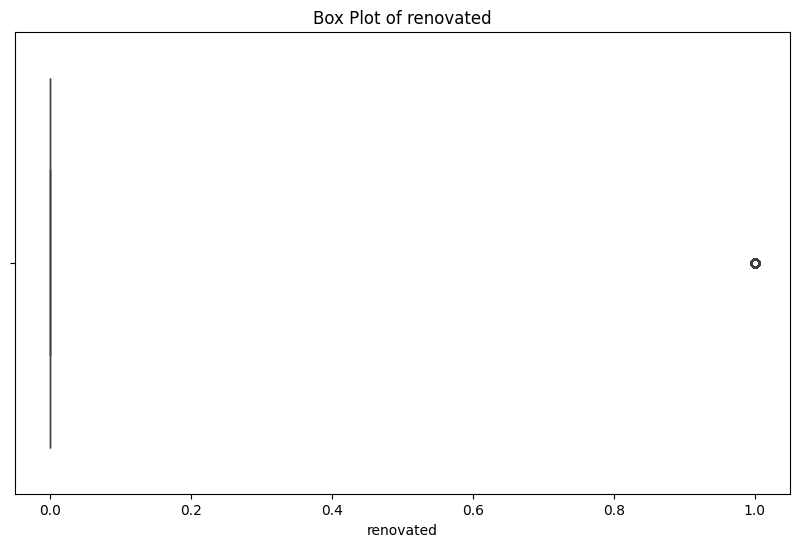

In [11]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x = df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [12]:
#reduce outlier
Q1 = df[numeric_features].quantile(.25)
Q3 = df[numeric_features].quantile(.75)
IQR = Q3 - Q1

In [13]:
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis =1)
df_filtered_numeric = df.loc[condition, numeric_features]

#add the filtered data to the main df
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

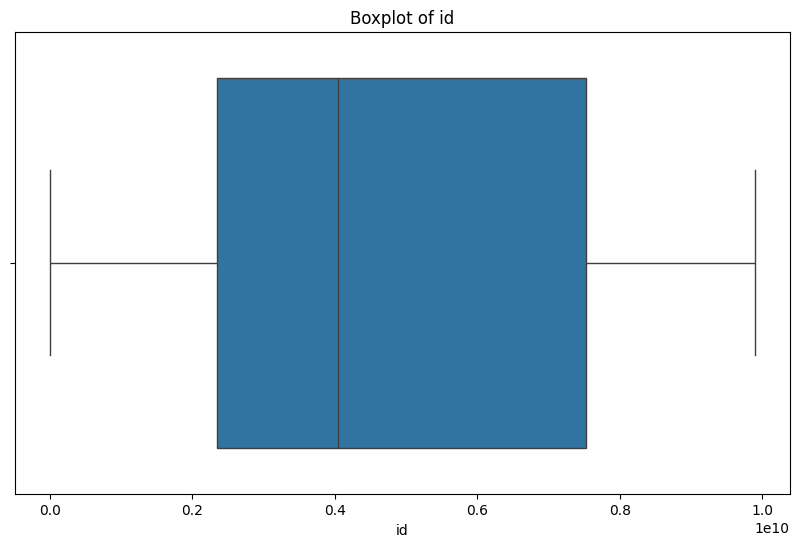

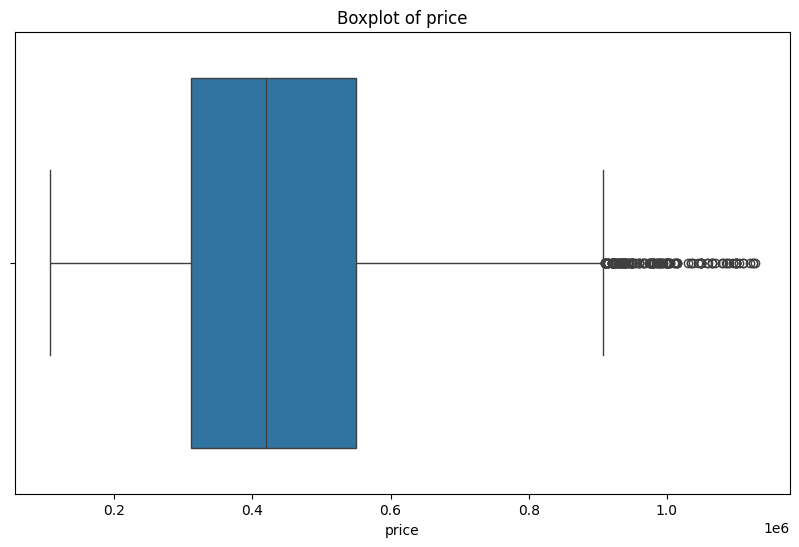

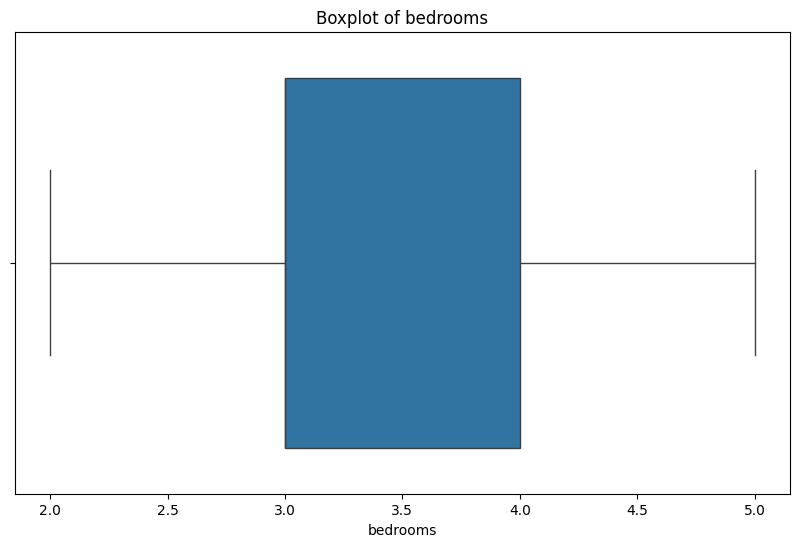

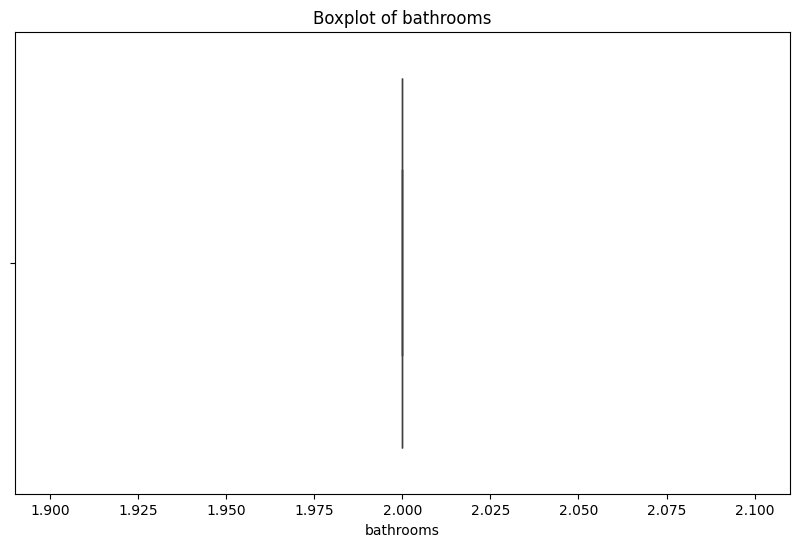

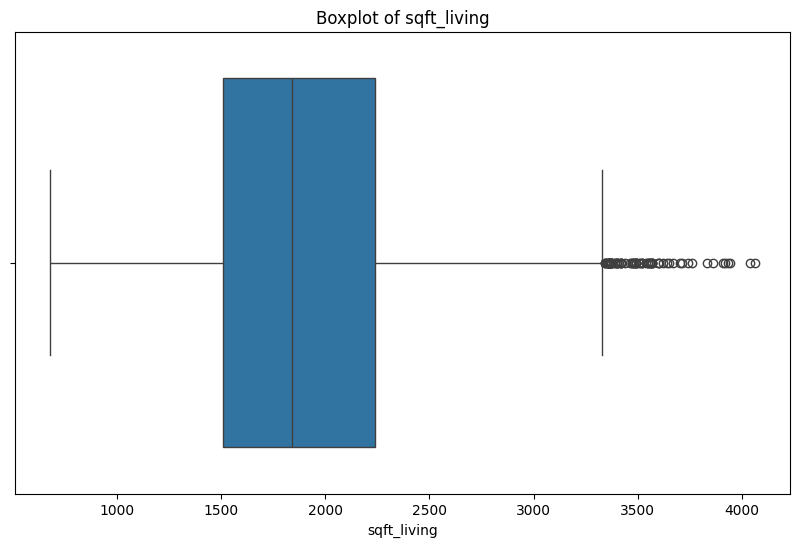

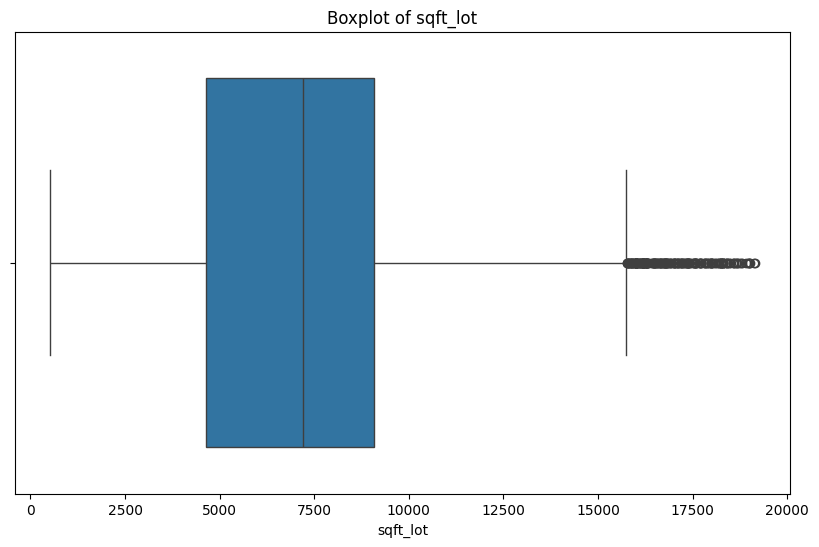

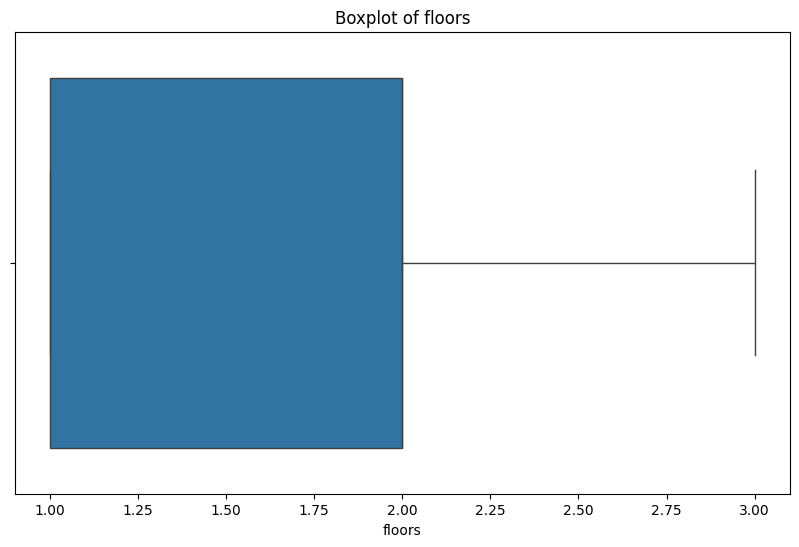

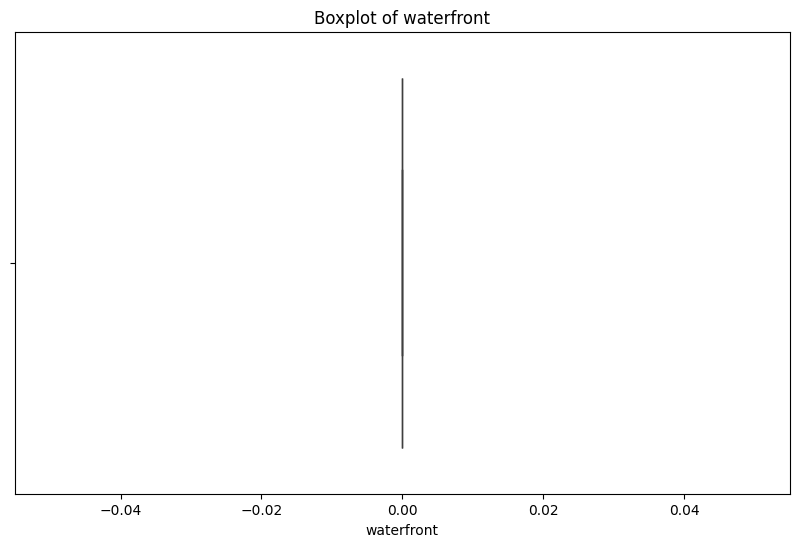

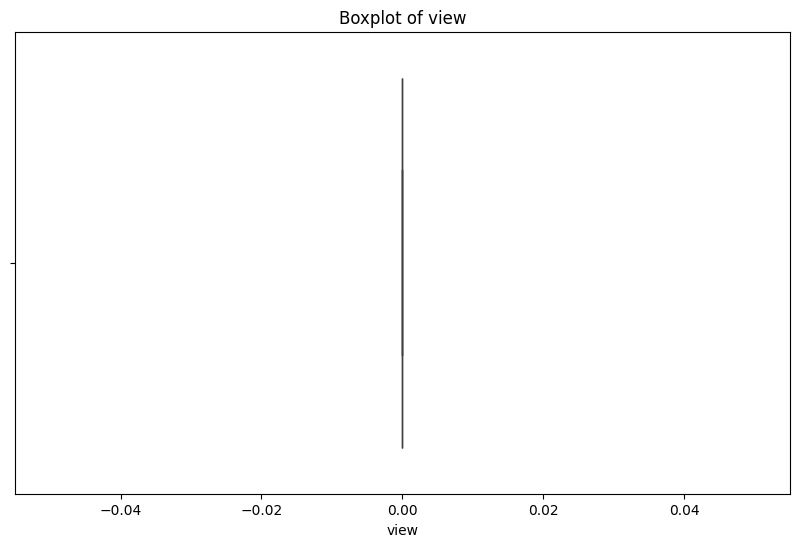

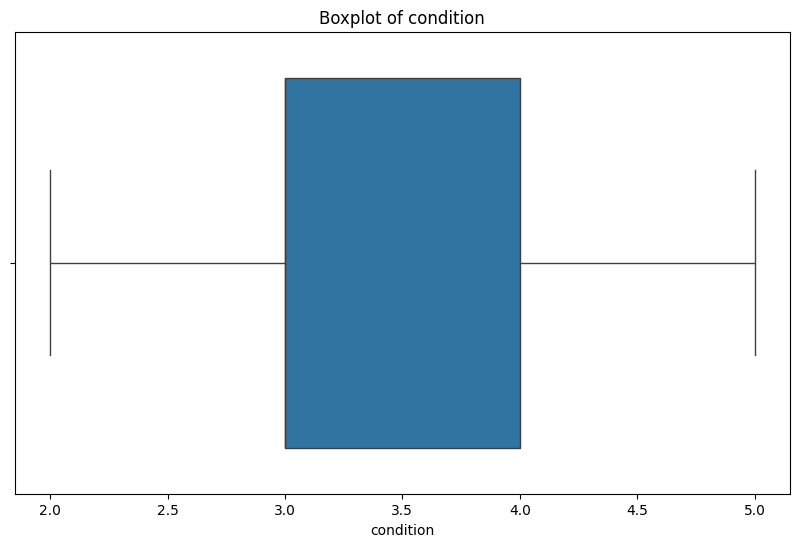

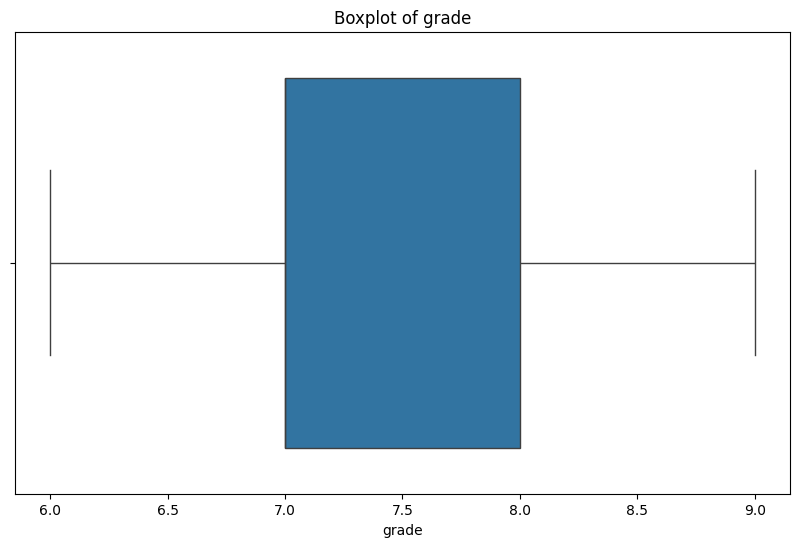

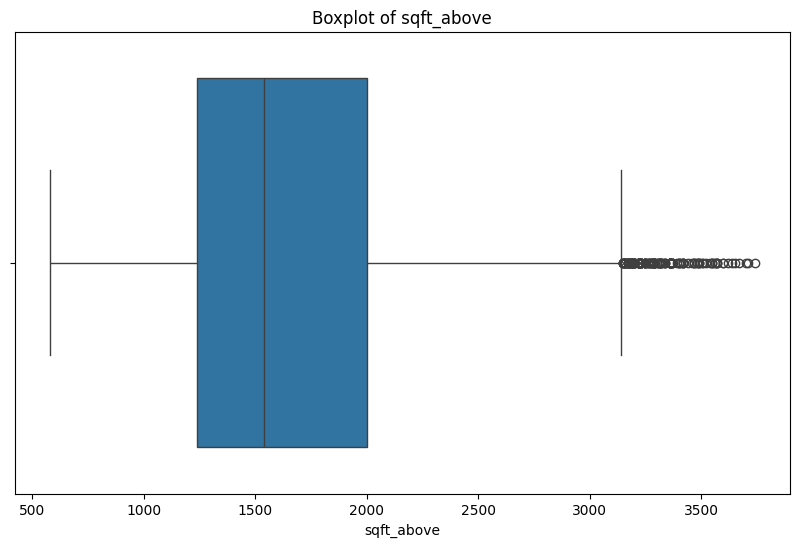

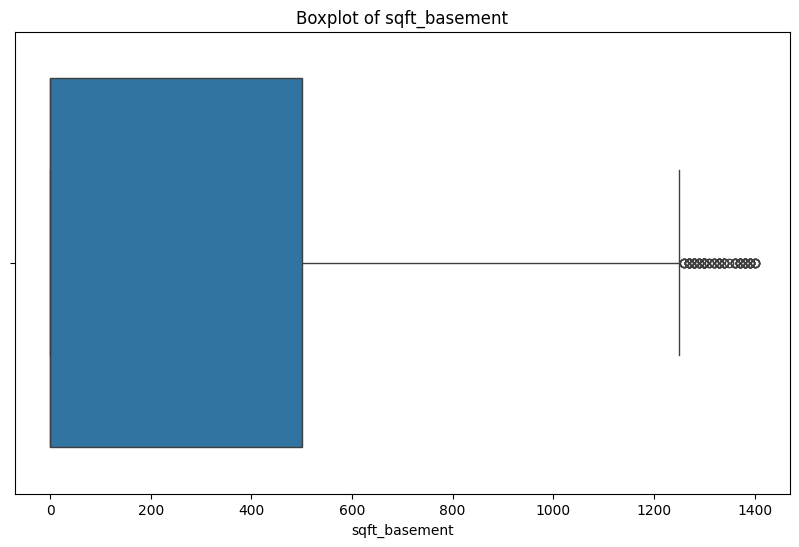

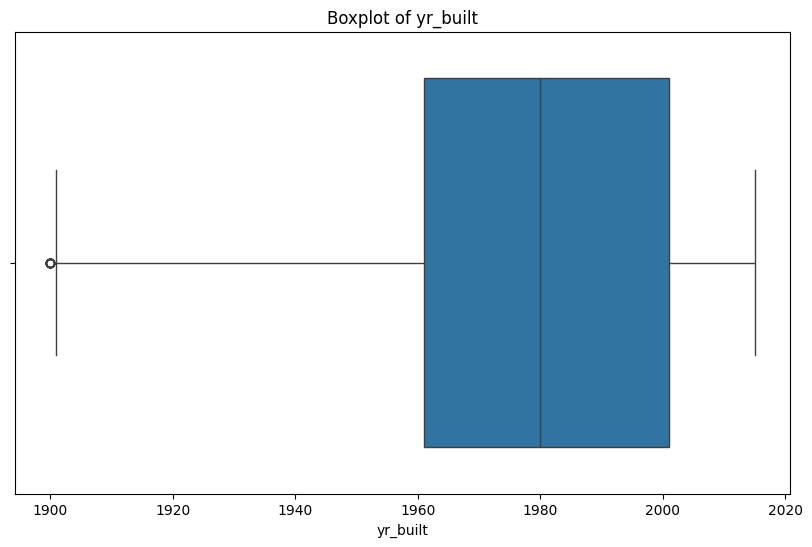

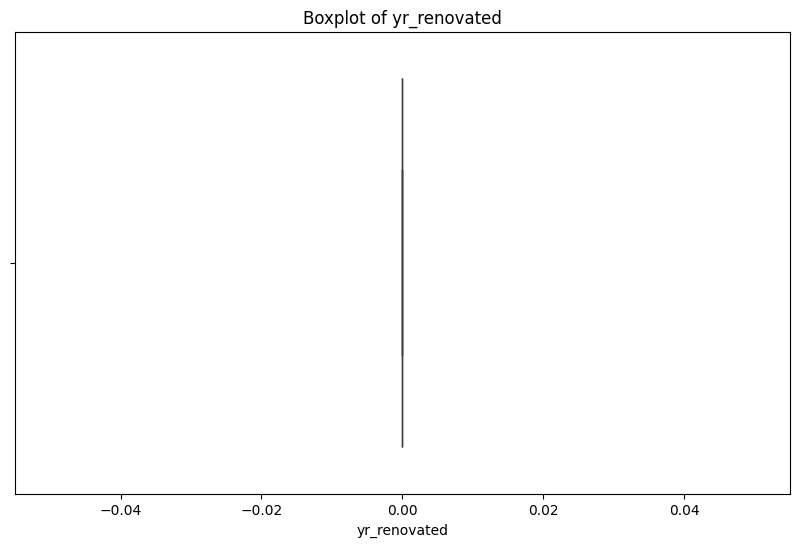

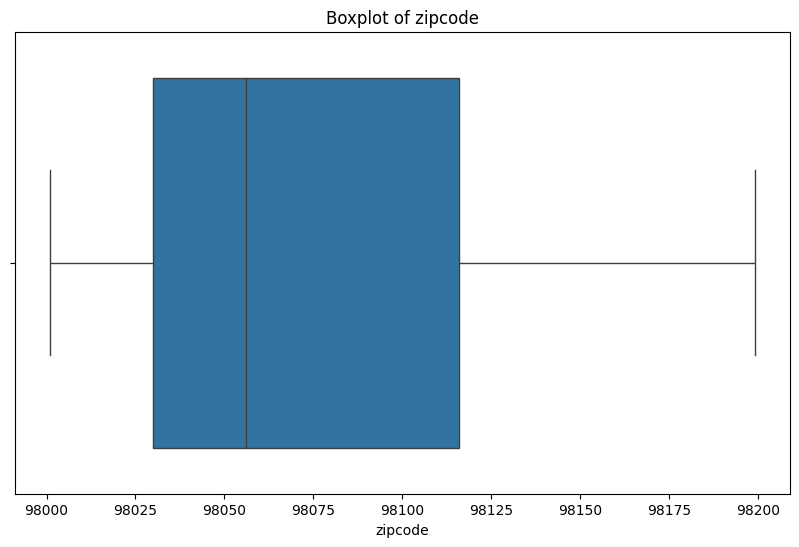

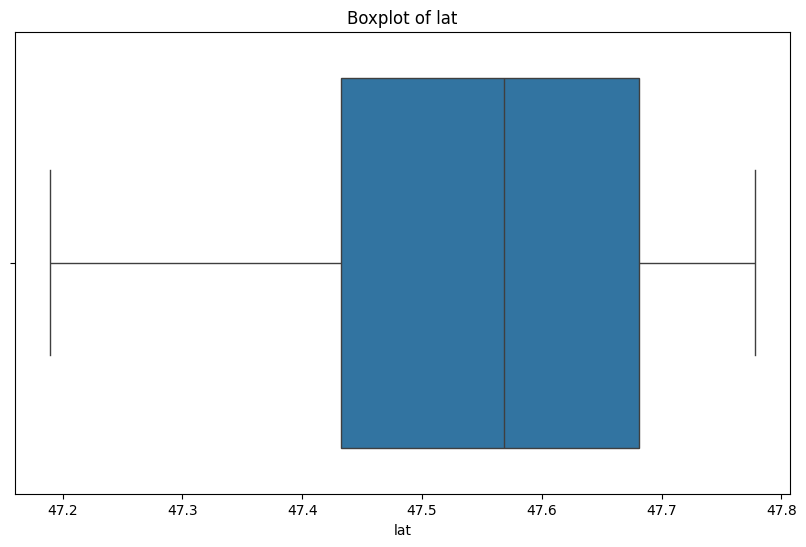

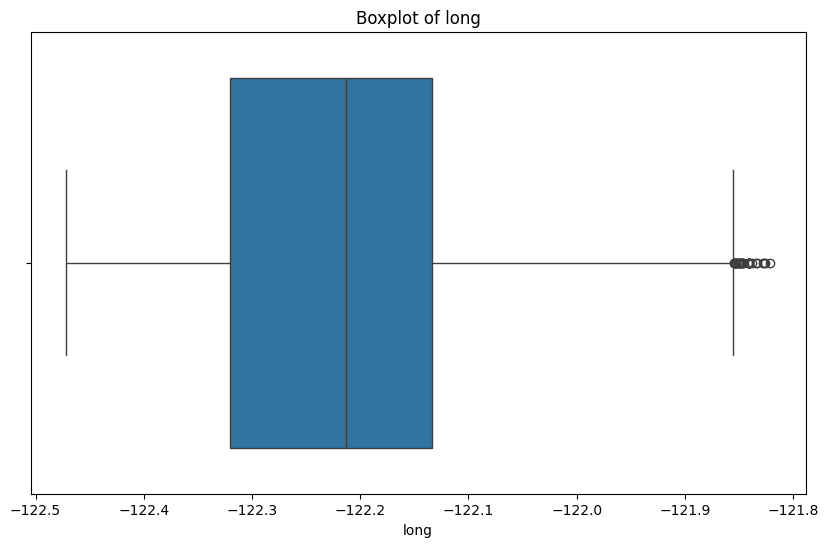

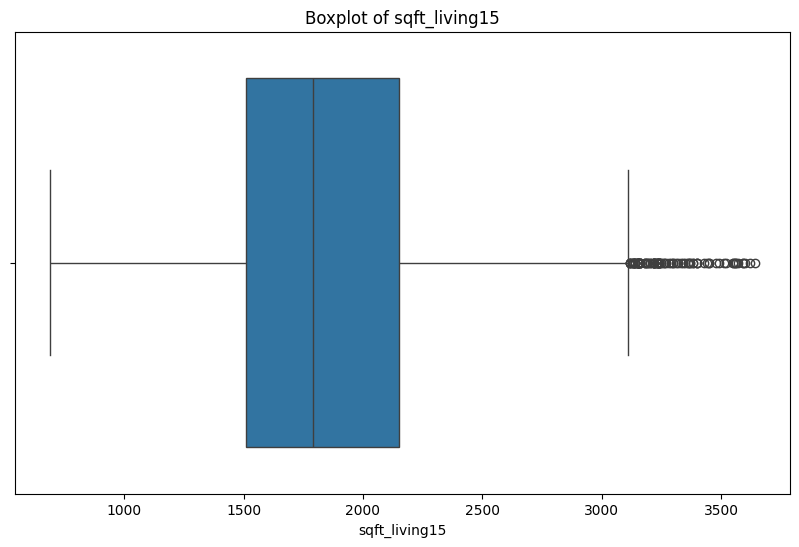

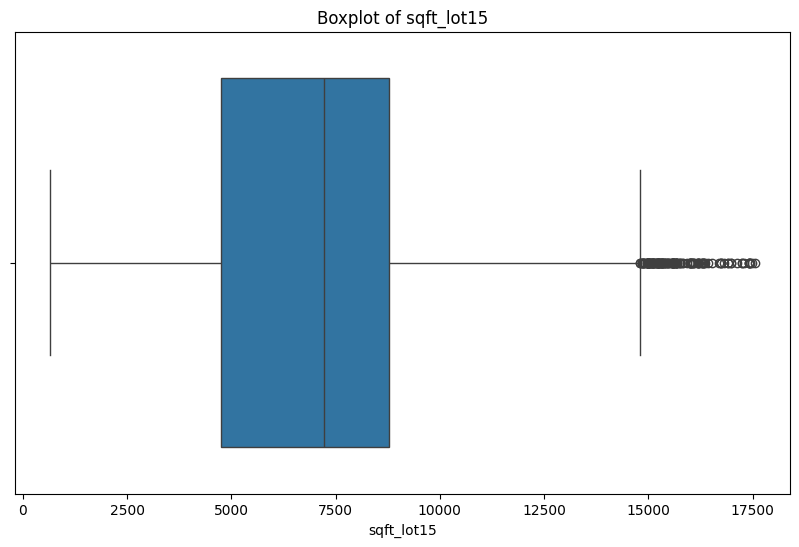

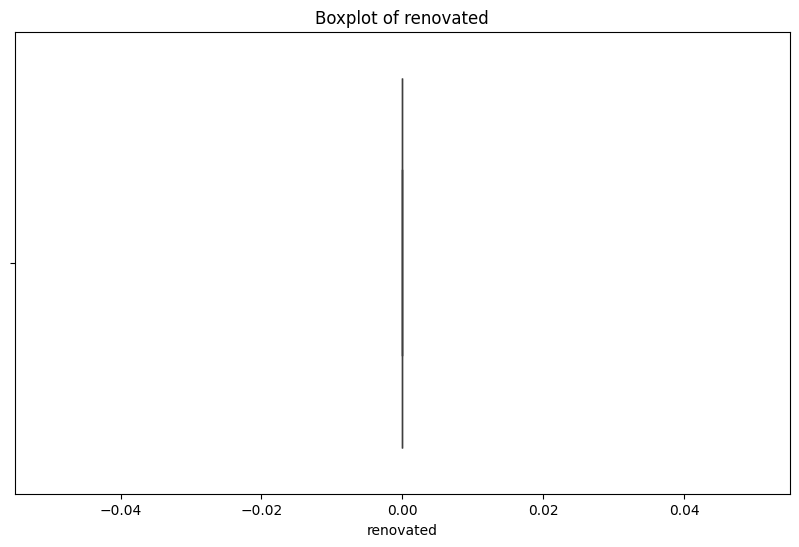

In [14]:
#check outlier result
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x = df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

column_keep = ['price', 'grade', 'sqft_living15', 'lat', 'sqft_above', 'bathrooms',
               'bedrooms', 'floors', 'sqft_basement', 'sqft_lot15', 'condition',
               'long', 'yr_built', 'waterfront', 'view', 'renovated']
df = df[column_keep]

features_to_scale = [col for col in df.columns if col != 'price']

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [16]:
import joblib
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

Text(0.5, 1.0, 'Before Standardization')

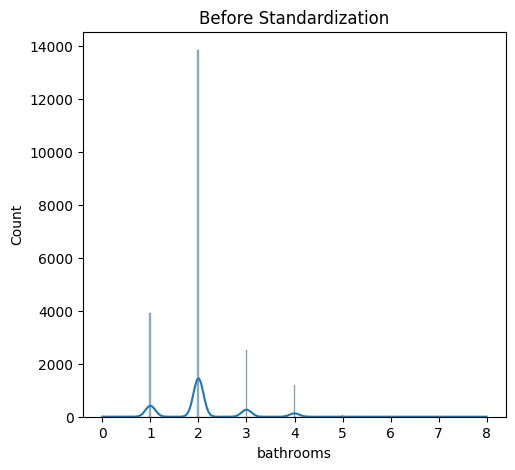

In [17]:
#before standarization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[3]], kde=True)
plt.title("Before Standardization")

Text(0.5, 1.0, 'After Standardization')

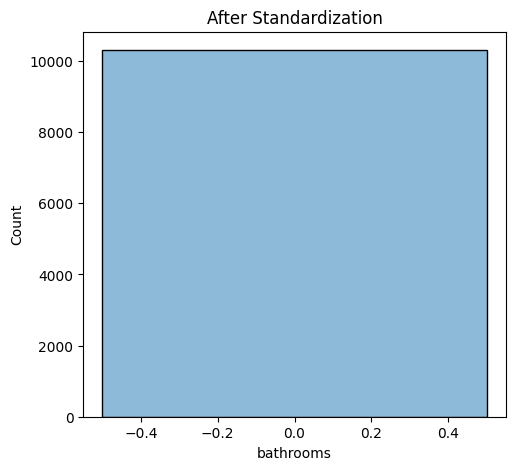

In [18]:
#after standardization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("After Standardization")

In [19]:
duplicated = df.duplicated()
print("duplicatied row: ")
print(df[duplicated])

duplicatied row: 
          price     grade  sqft_living15       lat  sqft_above  bathrooms  \
4352   259950.0  2.032009      -1.678286 -0.211233   -1.668374        0.0   
14983  585000.0  2.032009       0.911295 -0.053915    1.106292        0.0   
16380  629950.0  2.032009      -0.532078  0.617765   -0.961453        0.0   
20054  555000.0  0.667142       0.041026  0.083568    0.487736        0.0   
20524  529500.0  2.032009      -0.744339  0.202582   -0.448935        0.0   
20657  379900.0  0.667142      -0.595756 -0.054599    0.240314        0.0   

       bedrooms    floors  sqft_basement  sqft_lot15  condition      long  \
4352  -1.912346  0.758240       0.300877   -1.949205  -0.646684 -1.134578   
14983 -0.481591  0.758240      -0.672852    0.346675  -0.646684  0.339142   
16380 -0.481591  0.758240       0.885114   -1.724693  -0.646684 -1.270001   
20054 -0.481591  0.758240      -0.672852   -1.249638  -0.646684  0.968460   
20524 -0.481591  2.514801      -0.672852   -1.811244  -0.

In [20]:
category_feature = df.select_dtypes(include=['object']).columns
df[category_feature]

""
4
6
7
9
13
...
21605
21607
21608
21609


# Exploratory Data Analyze

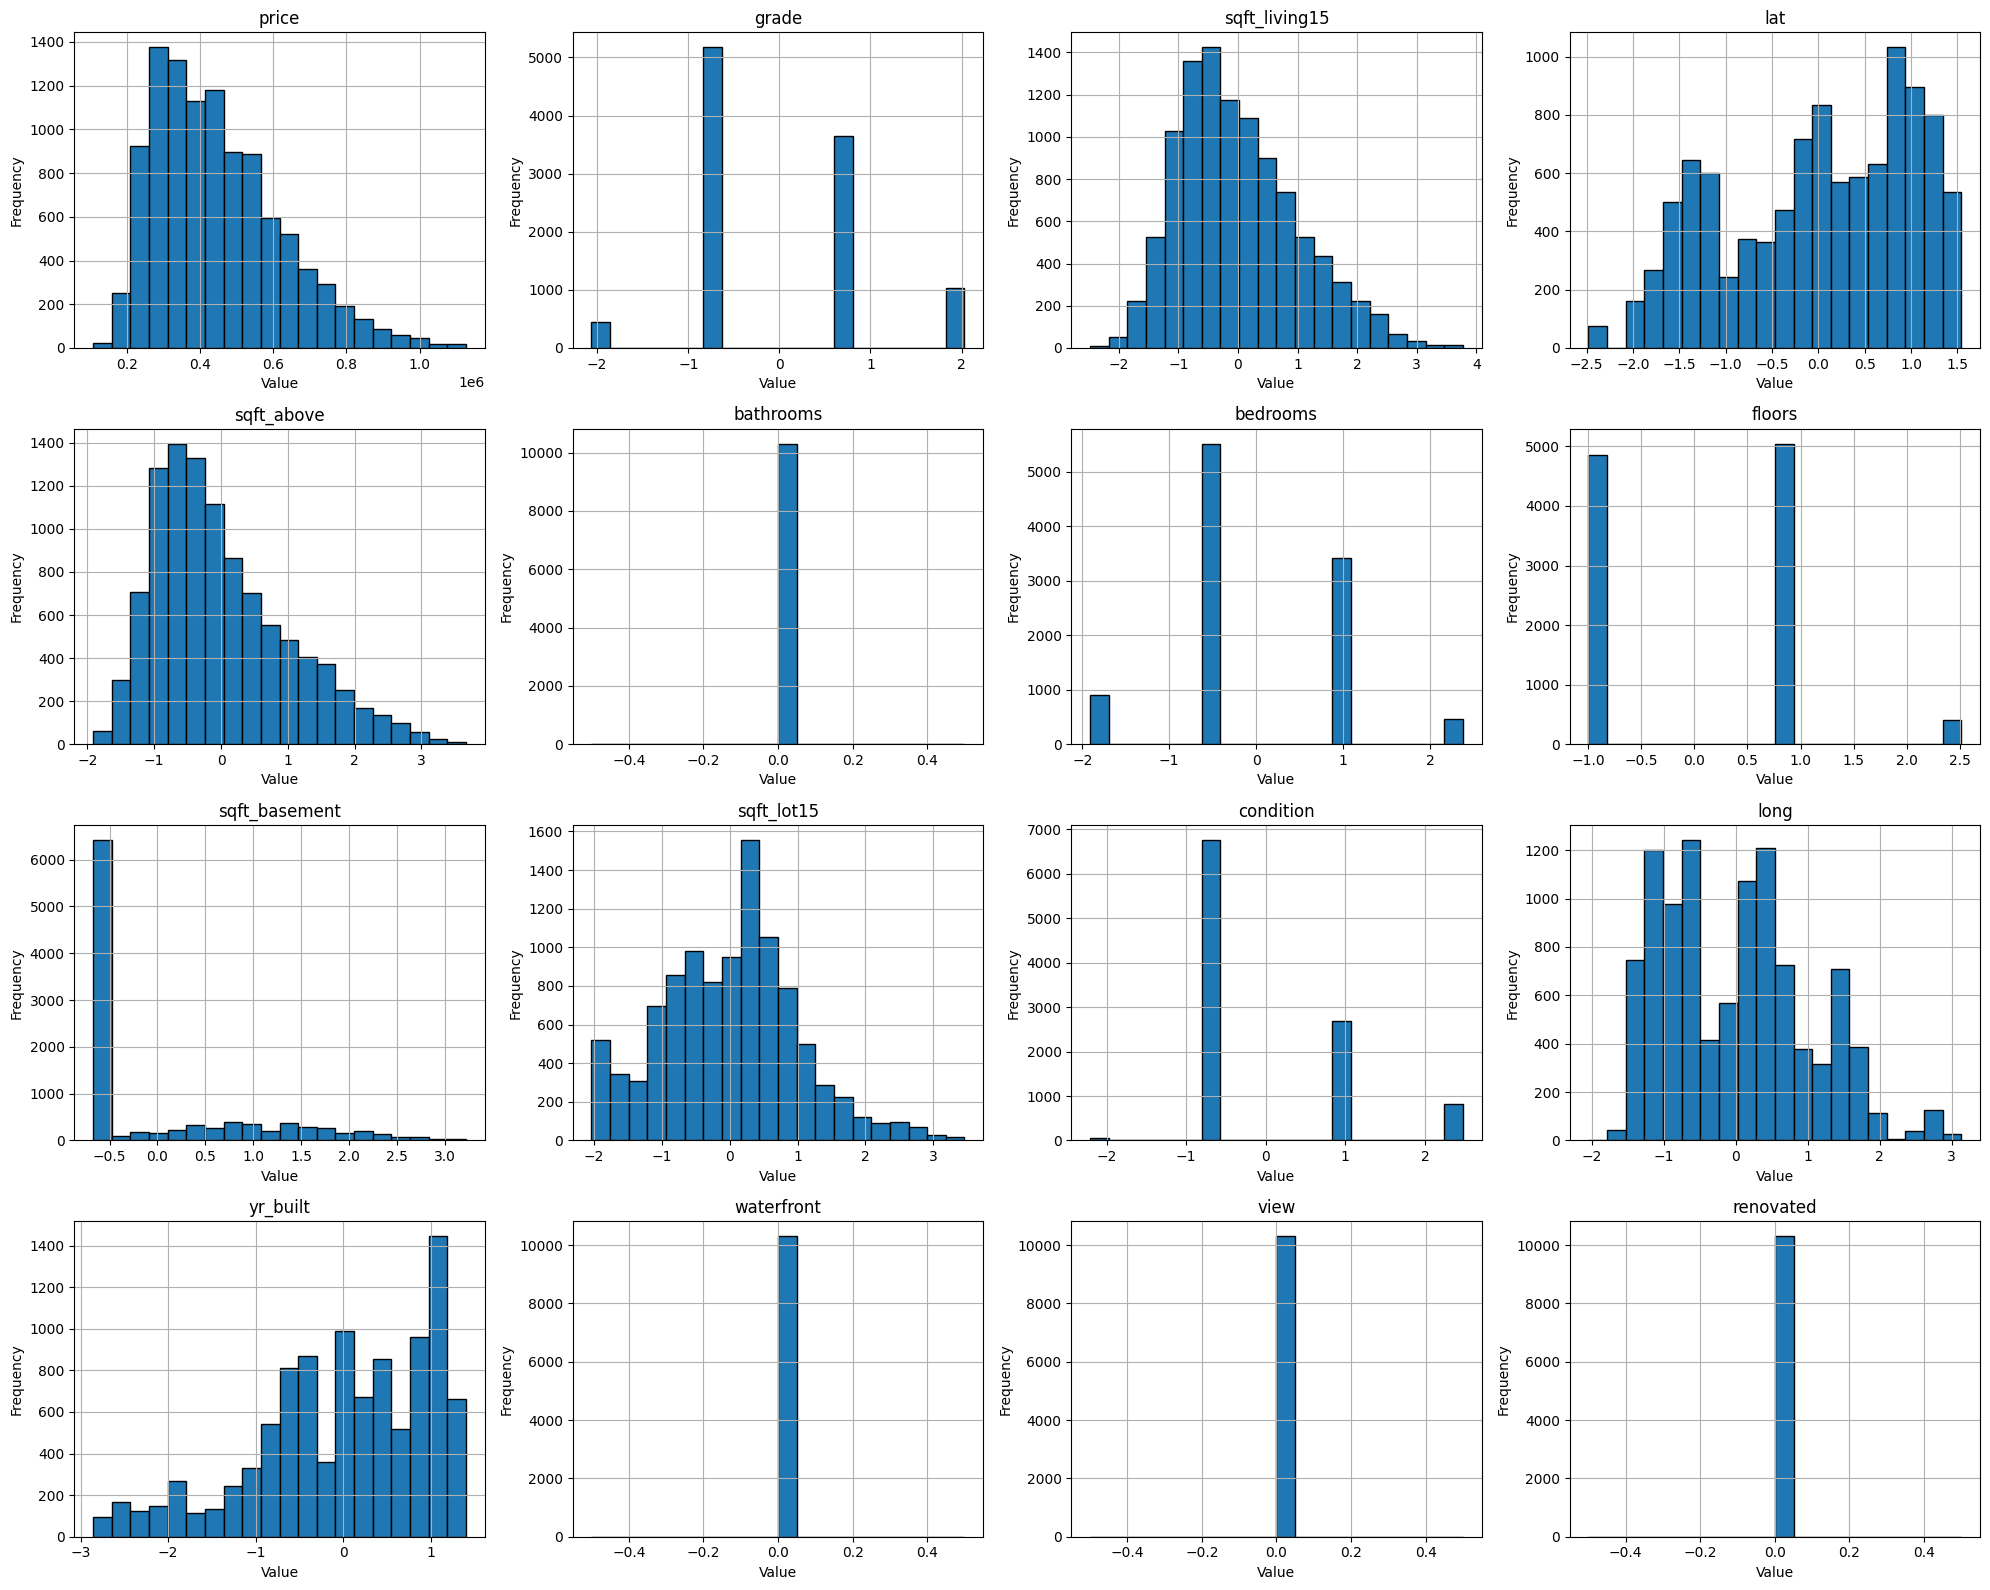

In [21]:
#count the amount of variable
num_vars = df.shape[1]

#define the amount of row and cols
n_cols = 4
n_rows = -(-num_vars // n_cols)

#create subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

#flatten axes array
axes = axes.flatten()

#plot every variable
for i, column in enumerate(df.columns):
    df[column].hist(ax = axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

#delete unused subplot if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10309 entries, 4 to 21611
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          10309 non-null  float64
 1   grade          10309 non-null  float64
 2   sqft_living15  10309 non-null  float64
 3   lat            10309 non-null  float64
 4   sqft_above     10309 non-null  float64
 5   bathrooms      10309 non-null  float64
 6   bedrooms       10309 non-null  float64
 7   floors         10309 non-null  float64
 8   sqft_basement  10309 non-null  float64
 9   sqft_lot15     10309 non-null  float64
 10  condition      10309 non-null  float64
 11  long           10309 non-null  float64
 12  yr_built       10309 non-null  float64
 13  waterfront     10309 non-null  float64
 14  view           10309 non-null  float64
 15  renovated      10309 non-null  float64
dtypes: float64(16)
memory usage: 1.3 MB


In [23]:
df_numeric = df.select_dtypes(include=['number'])

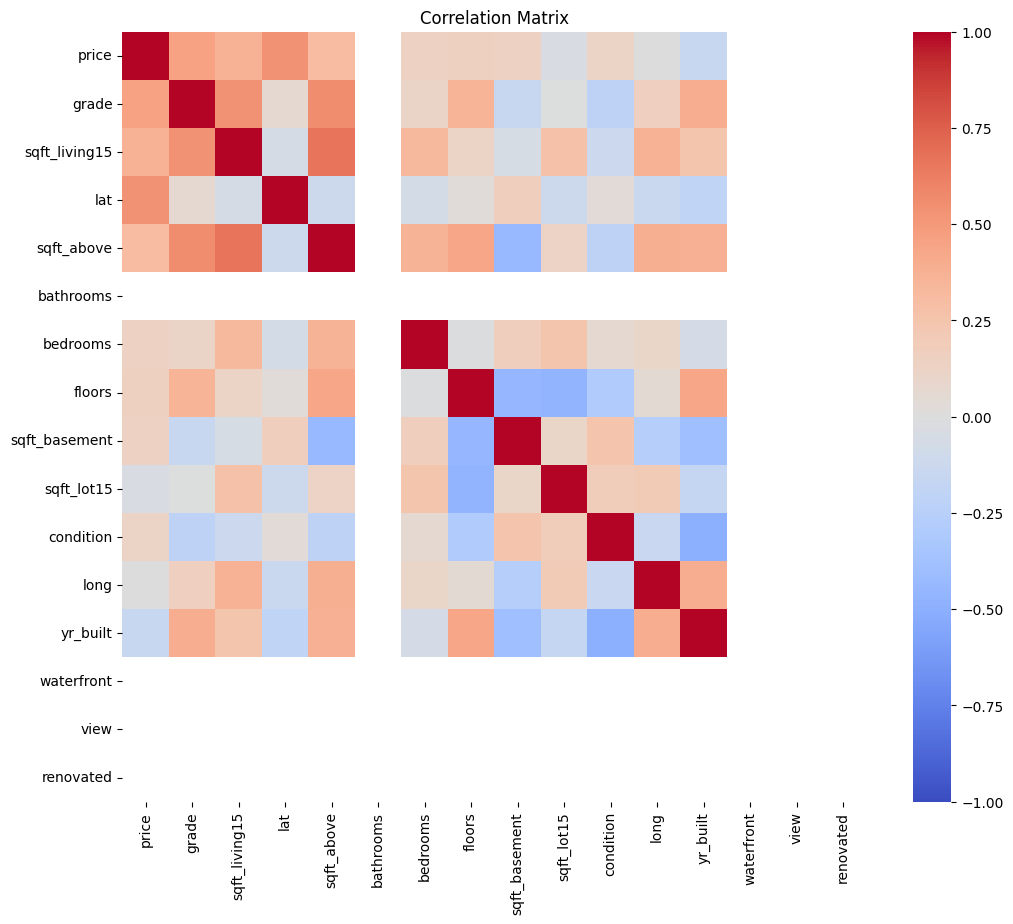

In [24]:
#matrix correlation
plt.figure(figsize=(12, 10))
correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

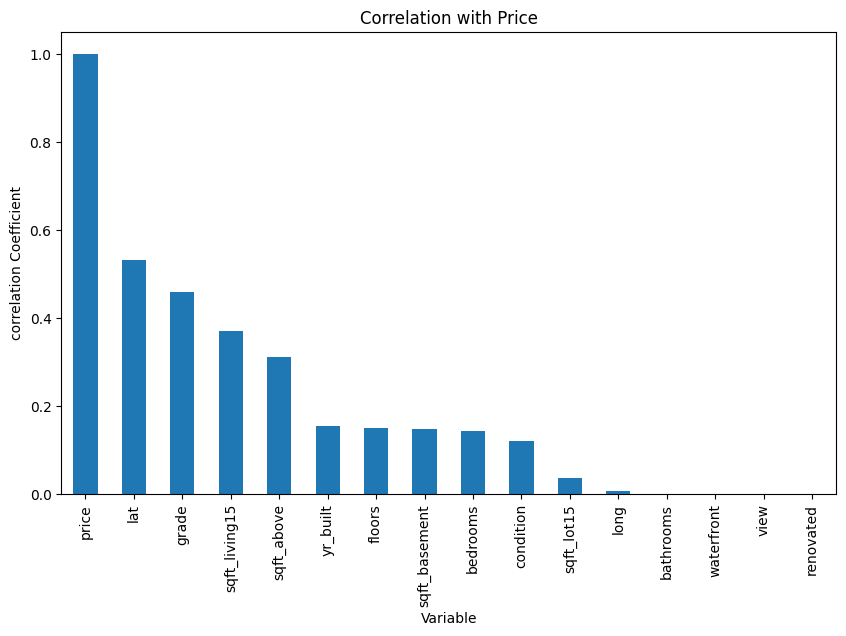

In [25]:
# Count correlation between variabel target and all other variable
target_corr = df_numeric.corr()['price']

target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize= (10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Price')
plt.xlabel("Variable")
plt.ylabel("correlation Coefficient")
plt.show()

In [26]:
#drop column that doesnt give must correlation to price
column_keep = ['price', 'grade', 'sqft_living15', 'lat', 'sqft_above', 'bathrooms',
                'bedrooms', 'floors', 'sqft_basement', 'sqft_lot15','condition', 
                'long', 'yr_built', 'waterfront', 'view', 'renovated']
df = df[column_keep]

# Data Splitting

In [27]:
import sklearn

In [28]:
X = df.drop(columns=['price'])
y = df['price']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
print("Amount of data: ", len(X))
print("Amount of train data: ", len(x_train))
print("Amount of test data: ", len(x_test))

Amount of data:  10309
Amount of train data:  8247
Amount of test data:  2062


# Modelling

In [31]:
# model 1, Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

In [32]:
# model 2, Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

In [33]:
# model 3, Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
}

GBR = GradientBoostingRegressor(random_state=184)

grid_search = GridSearchCV(
    estimator=GBR,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='r2'  # or 'neg_mean_squared_error'
)

grid_search.fit(x_train, y_train)

best_gbr = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# eva LARS
pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

# convert to df
df_result = pd.DataFrame(data, index=['lars'])
df_result

,MAE,MSE,R2
lars,129792.473647,2.679559e+10,0.083426


In [35]:
# eva LARS
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

# add to df
df_result.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_result

,MAE,MSE,R2
lars,129792.473647,2.679559e+10,0.083426
Linear Regression,78399.406415,1.101431e+10,0.623243


In [36]:
# eva LARS
pred_GBR = best_gbr.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

# add to df
df_result.loc['Gradient Boosting Regressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_result

,MAE,MSE,R2
lars,129792.473647,2.679559e+10,0.083426
Linear Regression,78399.406415,1.101431e+10,0.623243
Gradient Boosting Regressor,41602.599629,3.577465e+09,0.877629


# Deploy Model

In [37]:
import joblib

#save model
joblib.dump(best_gbr, 'gbr_model.joblib')


['gbr_model.joblib']